In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from typing import Optional, List, Callable, Any, Union, Dict
from itertools import product
from statistics import mean
from pathlib import Path
import gzip
import os
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from typing import Optional, List, Callable, Any, Union, Dict
from itertools import product
from statistics import mean
from pathlib import Path
import gzip
import os

### Load and preprocess data

In [2]:
data = pd.read_csv('./data/features_filtered.csv')
data.head()


,battleneturl,ratio_s,ratio_base,ratio_mineral,action_per_5_seconds,ratio_x1,hotkey01,hotkey02,hotkey10,hotkey11,...,hotkey61_f5,hotkey62_f5,hotkey70_f5,hotkey80_f5,hotkey90_f5,s_f5,Base_f5,played_race_Protoss,played_race_Terran,played_race_Zerg
0,53,0.063965,0.006264,0.000475,6.990596,0.000000,0.0,0.024773,0.038066,0.000000,...,0.0,0.0,0.0,0.0,0.0,5.0,1.0,True,False,False
1,29,0.051058,0.001139,0.000000,6.384615,0.001965,0.0,0.050151,0.039275,0.001813,...,0.0,0.0,0.0,0.0,0.0,6.0,3.0,True,False,False
2,53,0.040809,0.004460,0.000285,6.867347,0.000000,0.0,0.017822,0.016832,0.000000,...,0.0,0.0,0.0,0.0,0.0,4.0,2.0,True,False,False
3,29,0.037677,0.001993,0.000000,6.861386,0.001031,0.0,0.038806,0.031841,0.000995,...,0.0,0.0,0.0,0.0,0.0,5.0,2.0,True,False,False
4,53,0.019740,0.000190,0.000000,5.820755,0.000000,0.0,0.000000,0.018519,0.000000,...,0.0,0.0,0.0,0.0,0.0,4.0,2.0,True,False,False


In [9]:
# Check missing values before cleaning
missing_before = data.isna().sum().sum()
print(f"Missing values: {missing_before}")

Missing values: 0


In [126]:
#filter dataframe by non important features

#len(importance_df)
#filtered_df = pd.concat([data[importance_df['Feature'].head(25)], data['battleneturl']], axis=1)
#data = filtered_df

In [10]:
# Split the data into training and testing sets
X = data.drop(['battleneturl'], axis=1)
#X = data.drop(['battleneturl', 'played_race_Protoss', 'played_race_Terran', 'played_race_Zerg'], axis=1)
y = data['battleneturl']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train

,ratio_s,ratio_base,ratio_mineral,action_per_5_seconds,ratio_x1,hotkey01,hotkey02,hotkey10,hotkey11,hotkey12,...,hotkey61_f5,hotkey62_f5,hotkey70_f5,hotkey80_f5,hotkey90_f5,s_f5,Base_f5,played_race_Protoss,played_race_Terran,played_race_Zerg
227,0.054854,0.000095,0.000095,9.628571,0.004848,0.000000,0.000000,0.023474,0.002817,0.125822,...,1.0,1.0,0.0,0.0,0.0,6.0,0.0,False,True,False
365,0.116352,0.001329,0.000000,11.010949,0.034289,0.000000,0.000000,0.022711,0.037363,0.407326,...,0.0,0.0,0.0,0.0,0.0,6.0,1.0,False,False,True
2924,0.010819,0.000190,0.000095,8.160000,0.000000,0.000000,0.000000,0.075325,0.000000,0.392208,...,0.0,0.0,1.0,0.0,1.0,5.0,0.0,True,False,False
2501,0.041853,0.002562,0.000664,9.149378,0.001155,0.000830,0.000000,0.003320,0.000000,0.513693,...,0.0,0.0,0.0,0.0,0.0,3.0,2.0,True,False,False
2001,0.040714,0.005030,0.000000,13.087336,0.000000,0.000000,0.000000,0.029437,0.000000,0.422511,...,0.0,0.0,0.0,0.0,0.0,13.0,0.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.089589,0.000000,0.001424,9.551282,0.000494,0.000000,0.037700,0.001917,0.000000,0.275399,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False,True,False
1095,0.108095,0.004840,0.000190,10.379592,0.016999,0.000000,0.000000,0.014694,0.014694,0.202449,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,False,False,True
1130,0.035494,0.000380,0.000000,15.341463,0.013898,0.003252,0.091057,0.030894,0.026016,0.596748,...,0.0,0.0,0.0,0.0,1.0,3.0,2.0,False,False,True
1294,0.087406,0.000000,0.012907,12.275472,0.000000,0.000000,0.000000,0.024719,0.000000,0.367790,...,0.0,0.0,0.0,0.0,0.0,5.0,1.0,False,True,False


In [12]:
# Ensure all column names in X_train are strings
X_train.columns = X_train.columns.astype(str)

# Repeat the same for X_test if applicable
X_test.columns = X_test.columns.astype(str)

### Train the model

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from scipy.stats import randint, uniform

#list of hyperparameters to tune
param_dist = {
    'n_estimators': randint(100, 500),  # Random int between 100 and 500
    'max_depth': [None, 10, 20, 30],  # Discrete list is fine for categorical choices
    'min_samples_split': randint(2, 20),  # Random int between 2 and 20
    'min_samples_leaf': randint(2, 10),  # Random int between 2 and 10
    'max_features': ['sqrt', 'log2']  # Categorical list is fine
}


# Create the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search (only 10 trials)
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, 
    n_iter=30,  
    cv=2,  
    scoring='accuracy', 
    n_jobs=-1,  
    verbose=1, 
    random_state=42,
    error_score='raise',  # Ensure errors don't silently pass
    refit=True,  # Refit the best model after search
)

In [17]:
# Fit on training data
random_search.fit(X_train, y_train)

# Print best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Use the best model
best_rf = random_search.best_estimator_

Fitting 2 folds for each of 30 candidates, totalling 60 fits
Best Hyperparameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 406}


In [18]:
best_params = random_search.best_params_

# Train the final model with best parameters
rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# Train the model on the full training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=406, random_state=42)

In [19]:
# Make predictions
y_pred = rf_model.predict(X_test)

### Evaluate

In [20]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")

Accuracy: 0.89
F1-Score: 0.88


### Feature importance

In [21]:
# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

Feature Importances:
                 Feature  Importance
16              hotkey52    0.070746
15              hotkey42    0.066614
17              hotkey62    0.063309
14              hotkey32    0.061395
3   action_per_5_seconds    0.059672
9               hotkey12    0.056544
12              hotkey22    0.055359
7               hotkey10    0.054263
10              hotkey20    0.050675
21                     s    0.046335
6               hotkey02    0.046163
1             ratio_base    0.040426
18              hotkey72    0.039635
4               ratio_x1    0.037822
20              hotkey82    0.035147
2          ratio_mineral    0.026686
8               hotkey11    0.023645
0                ratio_s    0.020475
5               hotkey01    0.017047
41                  s_f5    0.013531
11              hotkey21    0.013340
43   played_race_Protoss    0.012543
44    played_race_Terran    0.009177
13              hotkey31    0.009029
45      played_race_Zerg    0.008880
19              h

In [22]:
import matplotlib.pyplot as plt

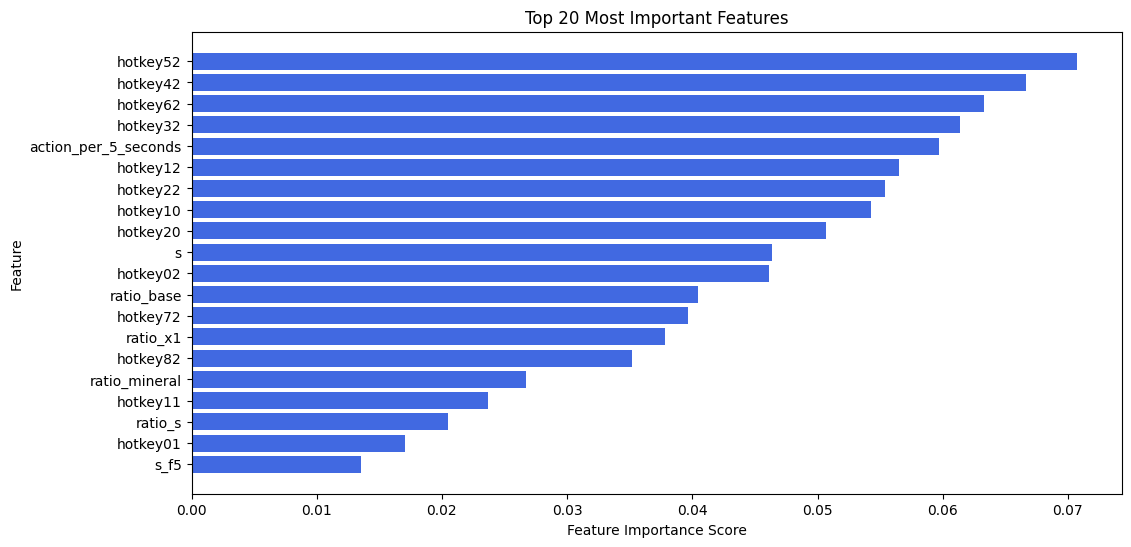

In [23]:
plt.figure(figsize=(12,6))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20], color='royalblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Most Important Features")
plt.gca().invert_yaxis()  # Flip to show most important features on top
#plt.show()

### Predict on test set

In [24]:
#load the calculated features on the test set
features_test = pd.read_csv('data/features_test_final.csv')
features_test.head(5)

,ratio_s,ratio_base,ratio_mineral,action_per_5_seconds,ratio_x0,ratio_x1,ratio_x2,Base,SingleMineral,hotkey00,...,hotkey80_f5,hotkey82_f5,hotkey90_f5,hotkey92_f5,s_f5,Base_f5,SingleMineral_f5,played_race_Protoss,played_race_Terran,played_race_Zerg
0,0.124395,0.002787,0.000440,18.674286,0.019583,0.013333,0.967083,0.021714,0.003429,0.016000,...,0,0,1,0,6,0,0,False,False,True
1,0.083908,0.000000,0.000000,11.301020,0.032219,0.000000,0.967781,0.000000,0.000000,0.002030,...,0,0,0,0,1,0,0,False,True,False
2,0.081561,0.002934,0.000000,14.442149,0.046217,0.000000,0.953783,0.016529,0.000000,0.000826,...,1,0,0,0,5,2,0,True,False,False
3,0.232947,0.002494,0.000293,10.458333,0.064677,0.069652,0.865672,0.011565,0.001361,0.000000,...,0,0,0,0,5,0,0,False,False,True
4,0.034619,0.003081,0.000000,4.206349,0.134545,0.025455,0.840000,0.031818,0.000000,0.004545,...,0,0,0,0,3,2,0,True,False,False


In [25]:
# Compare column names
train_columns = set(X_train.columns)  # Columns from the training data
test_columns = set(features_test.columns)    # Columns from the test data

if train_columns != test_columns:
    print("Mismatch in columns!")
    print("Missing in test:", train_columns - test_columns)
    print("Extra in test:", test_columns - train_columns)

Mismatch in columns!
Missing in test: set()
Extra in test: {'Base', 'ratio_x2', 'hotkey60', 'hotkey00', 'hotkey70', 'hotkey51_f5', 'hotkey30', 'hotkey40', 'hotkey91', 'hotkey31_f5', 'hotkey92_f5', 'hotkey51', 'hotkey72_f5', 'hotkey32_f5', 'hotkey80', 'SingleMineral_f5', 'hotkey82_f5', 'hotkey02_f5', 'SingleMineral', 'hotkey71_f5', 'hotkey41', 'hotkey90', 'hotkey61', 'hotkey92', 'hotkey50', 'ratio_x0', 'hotkey71'}


In [26]:
missing_columns = train_columns - test_columns
# Add the missing columns and set their values to 0
for col in missing_columns:
    features_test[col] = 0

In [27]:
# Reorder the columns in 'df' to match the order in 'reference_df'
features_test = features_test[X_train.columns]

In [28]:
#assert the column headers are in str format
features_test.columns = features_test.columns.astype(str)
#run prediction on test set
y_pred = rf_model.predict(features_test)

## Creation of dataframe for submission

In [29]:

# Create DataFrame with RowId and predicted battleneturl
df = pd.DataFrame({
    'RowId': range(1,len(y_pred)+1),
    'prediction': y_pred
})

# Get current timestamp for unique file naming
#timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
csv_filename = f"predictions_fr_kaggle_test.csv"


df.to_csv(f'data/predictions/{csv_filename}', index=False)
